In [1]:
import yfinance as yf

# Get the required price data
stocks = ['AAPL', 'TSLA', 'FB', 'MSFT']
price_data = yf.download(stocks, start='2021-04-01', end='2022-03-31')
price_data = price_data.loc[:,'Adj Close']
price_data.columns = stocks

# Calculate returns and drop rows with NaN values
stock_returns = price_data[stocks].pct_change().dropna()

stock_returns

[*********************100%***********************]  4 of 4 completed


,AAPL,TSLA,FB,MSFT
Date,,,,
2021-04-01,0.006959,0.014022,0.027909,-0.009252
2021-04-05,0.023577,0.034320,0.027729,0.044277
2021-04-06,0.002462,-0.008579,-0.004858,0.000825
2021-04-07,0.013390,0.022301,0.008230,-0.029857
2021-04-08,0.019234,-0.000224,0.013405,0.019122
...,...,...,...,...
2022-03-24,0.022678,0.028624,0.015393,0.014823
2022-03-25,0.003734,0.010247,-0.001381,-0.003235
2022-03-28,0.005037,0.007979,0.023117,0.080345


In [2]:
import riskfolio as rp

# Create a portfolio
my_portfolio = rp.Portfolio(returns=stock_returns)

# Set the method to estimate expected returns and covariance matrix
# The estimations are based on historical data
my_portfolio.assets_stats(method_mu='hist', method_cov='hist', d=0.94)

# Optimise the portfolio
stock_weights = my_portfolio.optimization(
    model='Classic', rm='MV', obj='Sharpe', hist=True)*100

stock_weights.weights.astype(str)

stock_weights.columns = ['Weights(%)']

stock_weights.round(2)

,Weights(%)
AAPL,75.85
TSLA,0.00
FB,11.45
MSFT,12.70


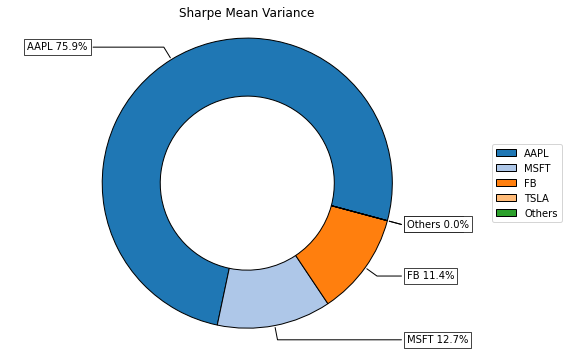

In [3]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=stock_weights/100, title='Sharpe Mean Variance', others=0, nrow=4, cmap="tab20",
                 height=5, width=8, ax=None)